# 基于太阳风参数与等离子体参数的Dst预测实验

## 0. conda环境选择

pytorch

程序基于Swarm_Dst的基础，主要是数据的选择上进行变更，深度学习架构的搭建也基于Swarm_Dst


## 1. 数据读取操作

    对下载到的OMNI数据进行预处理。截取相应的时间段

In [12]:
globals().clear()
import os
import numpy as np
import pandas as pd

#----------------------确定筛选参数
begin_year   = 2014
end_year     = 2023

#  建议直接复制下列字符串
select_para  = ['year', 'Day', 'Hour', 'Mag_Avg_scalar', 'Mag_Avg_vec', 'Bx_GSE', 'By_GSM', 'Bz_GSM', 
                'Proton_temperature', 'Proton_density', 'Bulk_speed', 'Flow_Pressure', 'Electric_field', 'DST']     

OMNI_path      = "../OMNI/omni2_all_years.dat"
select_dir     = "../OMNI_select/"

#----------------------读取OMNI文件并保存到相应数据矩阵中 详情见data_frame.txt
OMNI_data = pd.read_table(OMNI_path, sep="\s+", engine='python', header=None)
OMNI_data.columns = ['year',            'Day',           'Hour',               'Rotation_Number',  'ID_IMF_SC',
                      'ID_Plasma_SC',   'IMF_Avgs',      'Plasma_Avgs',        'Mag_Avg_scalar',   'Mag_Avg_vec',
                      'Lat_Ang_avg',    'Lon_Ang_avg',   'Bx_GSE',             'By_GSE',           'Bz_GSE', 
                      'By_GSM',         'Bz_GSM',        'sigma-|B|',          'sigma-B',          'sigma-Bx', 
                      'sigma-By',       'sigma-Bz',      'Proton_temperature', 'Proton_density',   'Bulk_speed', 
                      'Bulk_flow_lon',  'Bulk_flow_lat', 'Na/Np',              'Flow_Pressure',    'sigma-T',
                      'sigma-n',        'sigma-V',       'sigma-phi-V',        'sigma-theta-V',    'sigma-ratio', 
                      'Electric_field', 'Plasma_beta',   'Alfven_mach_number', 'Kp*10',            'R', 
                      'DST',            'AE',            'PROT_Flux_1',        'PROT_Flux_2',      'PROT_Flux_4', 
                      'PROT_Flux_10',   'PROT_Flux_30',  'PROT_Flux_60',       'M_SPH_Flux _Flag', 'ap',
                      'f10.7_index',    'PC(N)',         'AL-index',           'AU-index',         'MAC', 
                      'Daily_Solar_Lyman-alpha', 'Proton_Quasy-Invariant']

#-----------------------创建保存输出文件的文件夹
if not os.path.exists(select_dir):
    os.makedirs(select_dir)

#-----------------------数据清洗，去除掉时间段以外的数据
OMNI_data_select = OMNI_data[select_para]
del OMNI_data

OMNI_data_select = OMNI_data_select[OMNI_data_select['year'] <= end_year]
OMNI_data_select = OMNI_data_select[OMNI_data_select['year'] >= (begin_year - 1)]
OMNI_data_select.drop(OMNI_data_select[(OMNI_data_select['year'] == (begin_year-1)) & (OMNI_data_select['Day'] <= 364)].index, axis=0, inplace=True)  #!!!!!注意逻辑计算中的括号


#-----------------------数据清洗，去除掉，所选参数为99999的数据
OMNI_data_select.drop(OMNI_data_select[OMNI_data_select['Mag_Avg_scalar'] == 999.9 ].index, axis=0, inplace=True)
OMNI_data_select.drop(OMNI_data_select[OMNI_data_select['Mag_Avg_vec'] == 999.9 ].index, axis=0, inplace=True)
OMNI_data_select.drop(OMNI_data_select[OMNI_data_select['Bx_GSE'] == 999.9 ].index, axis=0, inplace=True)
OMNI_data_select.drop(OMNI_data_select[OMNI_data_select['By_GSM'] == 999.9 ].index, axis=0, inplace=True)
OMNI_data_select.drop(OMNI_data_select[OMNI_data_select['Bz_GSM'] == 999.9 ].index, axis=0, inplace=True)
OMNI_data_select.drop(OMNI_data_select[OMNI_data_select['Proton_temperature'] == 9999999.0 ].index, axis=0, inplace=True)
OMNI_data_select.drop(OMNI_data_select[OMNI_data_select['Proton_density'] == 999.9 ].index, axis=0, inplace=True)
OMNI_data_select.drop(OMNI_data_select[OMNI_data_select['Bulk_speed'] == 9999.0 ].index, axis=0, inplace=True)
OMNI_data_select.drop(OMNI_data_select[OMNI_data_select['Flow_Pressure'] == 99.99 ].index, axis=0, inplace=True)
OMNI_data_select.drop(OMNI_data_select[OMNI_data_select['Electric_field'] == 999.99  ].index, axis=0, inplace=True)
OMNI_data_select.drop(OMNI_data_select[OMNI_data_select['DST'] == 99999 ].index, axis=0, inplace=True)
#---------------------------------------------------save data
# data_mat_finish = OMNI_data_select.to_numpy()
# save_file       = select_dir + 'OMNI_data_' + '_finishedtest.npy'
# np.save(save_file,data_mat_finish)
save_file       = select_dir + 'OMNI_data_finishedtest' + str(begin_year).zfill(4) + '_' + str(end_year).zfill(4) + '.csv'
OMNI_data_select.to_csv(save_file, index=False)


<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
C:\Users\WIN10\AppData\Local\Temp\ipykernel_33412\1657024983.py:18: SyntaxWarning: invalid escape sequence '\s'
  OMNI_data = pd.read_table(OMNI_path, sep="\s+", engine='python', header=None)


In [10]:
print(OMNI_data_select.dtypes)

year                    int64
Day                     int64
Hour                    int64
Mag_Avg_scalar        float64
Mag_Avg_vec           float64
Bx_GSE                float64
By_GSM                float64
Bz_GSM                float64
Proton_temperature    float64
Proton_density        float64
Bulk_speed            float64
Flow_Pressure         float64
Electric_field        float64
DST                     int64
dtype: object


## 2. 对预处理数据输入模型

    实验解算，使用环境pytorch,神经网络模块以swarm_Dst为蓝本，备份另存为MLP_reg_OMNI   my_utils_OMNI

In [1]:
globals().clear()
import numpy as np
import pandas as pd


#----------------------确定筛选年份
begin_year   = 2014
end_year     = 2023

#----------------------确定输入文件
select_dir     = "../OMNI_select/"
input_file     = select_dir + 'OMNI_data_finishedtest' + str(begin_year).zfill(4) + '_' + str(end_year).zfill(4) + '.csv'

#----------------------确定输入参数
N_hidden_layer = 3
D_delay        = 9
S_shift        = 2

parameter      = ['year', 'Day', 'Hour', 'Mag_Avg_vec', 'Bz_GSM', 'Proton_temperature',
                 'Proton_density', 'Bulk_speed', 'Flow_Pressure', 'Electric_field', 'DST']
input_para     = ['Mag_Avg_vec', 'Bz_GSM', 'Proton_density', 'Bulk_speed', 'Flow_Pressure', 'Electric_field']


df = pd.read_csv(input_file)
OMNI_data_para = df[parameter]

#---------------------根据时移和延迟修改数据矩阵

input_data  = pd.DataFrame(np.random.randn(1,D_delay*len(input_para)+1))
begin_index = OMNI_data_para[(OMNI_data_para['year'] <= begin_year) & (OMNI_data_para['Day'] == 1) & (OMNI_data_para['Hour'] == 0)].index[0]  

#在使用pandas时，常常需要选出某一行的index作为结果，但是想要再使用这个index的值作为之后代码的输入时，往往需要int类型，
# 而pandas返回的值都是Int64Index类型，不能直接使用，在尝试了astype() 和int(index)强制转换都不对之后，发现返回的Int64Index是一个list类型，
# 尽管里面只有一个值，因此需要使用index[0]才能得到index的值

data_np     = np.zeros((1,D_delay*len(input_para)+1))

for j in range(begin_index,OMNI_data_para.shape[0]-S_shift) :

    for i in range(D_delay) :
        np_single = OMNI_data_para.loc[j-i-1,input_para].to_numpy()
        data_np[0,i*len(input_para) : (i+1)*len(input_para)] = np_single

    data_np[0,-1] = df.loc[j+S_shift,'DST']     #  dataframe单个值 就是numpy 不需要转化

    df_app     = pd.DataFrame(data_np)
    input_data = pd.concat([input_data,df_app], ignore_index=True)

input_data.drop(input_data.index[0], axis=0, inplace=True)
input_data.rename(columns={63 : "Dst"},inplace=True)

save_file       = 'OMNI_data_input_all' + str(begin_year).zfill(4) + '_' + str(end_year).zfill(4) + '.csv'
input_data.to_csv(save_file, index=False)



In [11]:
globals().clear()
import pandas as pd
from sklearn.model_selection import train_test_split
file_ = pd.read_csv('OMNI_data_input_all2014_2023.csv', encoding="utf-8-sig",index_col=False)
data1,data2 =train_test_split(file_,test_size=0.3,random_state=1100)

Epoch [1/200]
Iter:    59,  Train Loss: 3.76e+02,  Train R2: -0.196,  Val Loss: 3.21e+02,  Val R2: -0.196,  Val Mse: 3.23e+02,  Time: 0:00:01 *
Epoch [2/200]
Iter:    59,  Train Loss: 3.28e+02,  Train R2:  -0.15,  Val Loss: 3.08e+02,  Val R2: -0.148,  Val Mse: 3.1e+02,  Time: 0:00:01 *
Epoch [3/200]
Iter:    59,  Train Loss: 2.82e+02,  Train R2: -0.138,  Val Loss: 3.02e+02,  Val R2: -0.113,  Val Mse:  3e+02,  Time: 0:00:02 *
Epoch [4/200]
Iter:    59,  Train Loss: 2.75e+02,  Train R2: -0.0762,  Val Loss: 2.94e+02,  Val R2: -0.0855,  Val Mse: 2.93e+02,  Time: 0:00:02 *
Epoch [5/200]
Iter:    59,  Train Loss: 1.95e+02,  Train R2: -0.0554,  Val Loss: 2.88e+02,  Val R2: -0.0635,  Val Mse: 2.87e+02,  Time: 0:00:03 *
Epoch [6/200]
Iter:    59,  Train Loss: 2.89e+02,  Train R2: -0.0387,  Val Loss: 2.81e+02,  Val R2: -0.0466,  Val Mse: 2.82e+02,  Time: 0:00:03 *
Epoch [7/200]
Iter:    59,  Train Loss: 2.45e+02,  Train R2: -0.0394,  Val Loss: 2.79e+02,  Val R2: -0.0336,  Val Mse: 2.79e+02,  Tim

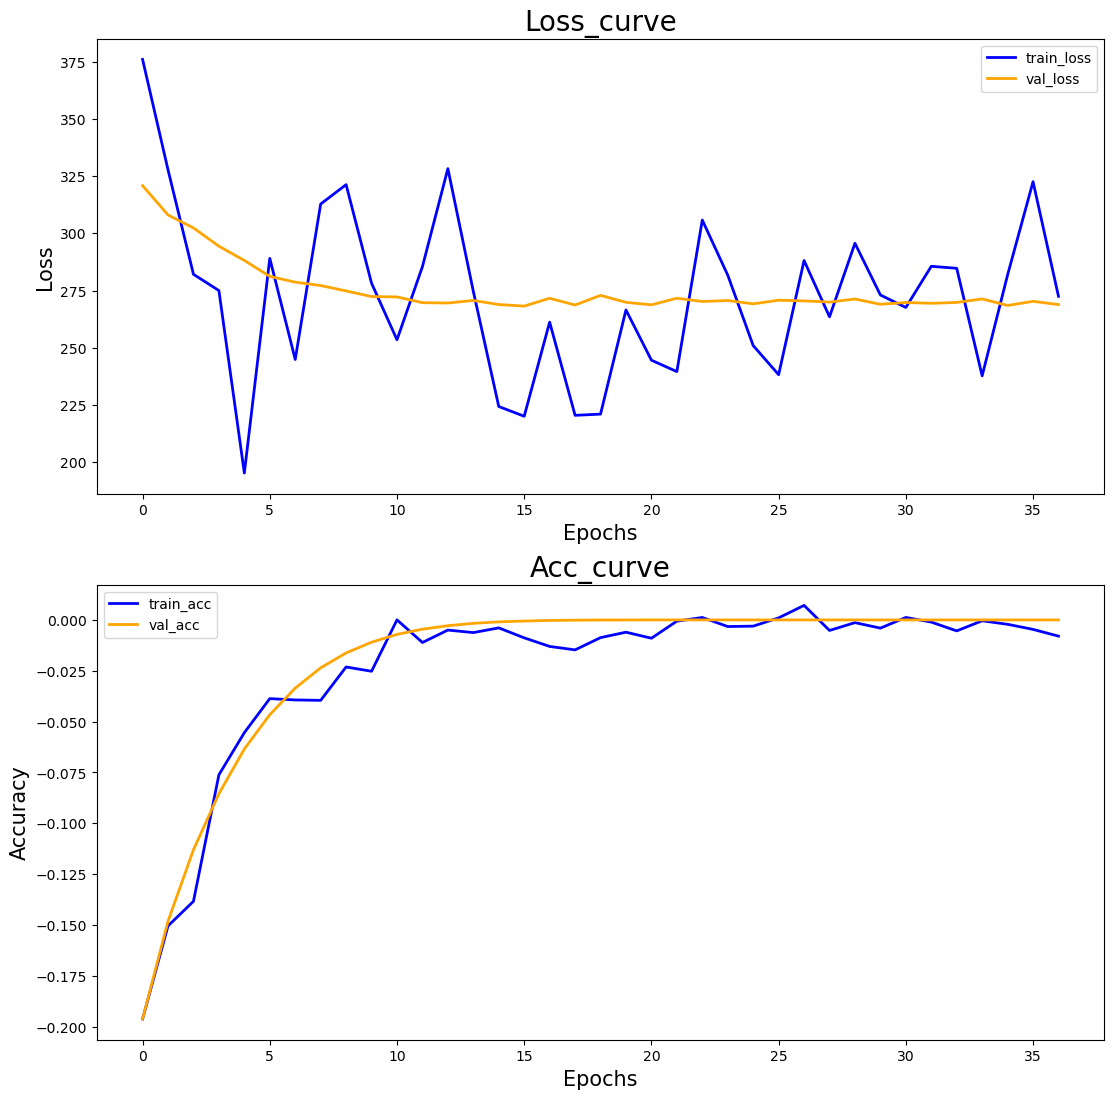

In [6]:
globals().clear()
import MLP_reg_OMNI
import my_utils_OMNI

config_ = my_utils_OMNI.Config_finished(data_path='OMNI_data_input_all2014_2023.csv',
                             name='regress',
                             batch_size=1000,
                             learning_rate=0.001,
                             epoch=200)

rag = MLP_reg_OMNI.MLP(        
        input_n=54,
        output_n=1,
        num_layer=3,
        layer_list=[60,100,20],
        dropout=0.1)


model = my_utils_OMNI.REG_model(rag, config_)
model.run()